In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from darts import TimeSeries

In [2]:
def plot_box_for_row(row):
    """
    Gera um box plot para uma linha específica do DataFrame.

    Parâmetros:
    row (pd.Series): A linha do DataFrame que contém os dados para o box plot.

    Retorna:
    None: Exibe o box plot.
    """
    metrics = {
        "MAE": [
            row["MAE_Min"],
            row["MAE_1Q"],
            row["MAE_Median"],
            row["MAE_3Q"],
            row["MAE_Max"],
        ],
        "RMSE": [
            row["RMSE_Min"],
            row["RMSE_1Q"],
            row["RMSE_Median"],
            row["RMSE_3Q"],
            row["RMSE_Max"],
        ],
        "MSE": [
            row["MSE_Min"],
            row["MSE_1Q"],
            row["MSE_Median"],
            row["MSE_3Q"],
            row["MSE_Max"],
        ],
    }

    fig, ax = plt.subplots()
    ax.boxplot(
        metrics.values(), tick_labels=metrics.keys()
    )  # Atualização do nome do parâmetro

    ax.set_title(f"Box Plot for {row['Model']} - {row['target']} - {row['Activity']}")
    ax.set_ylabel("Values")

    plt.show()

In [3]:
df = pd.read_csv(r"..\checkpoints\results\uni_all_stats.csv")

In [4]:
df

,Model,target,Activity,MAE_Min,MAE_1Q,MAE_Median,MAE_3Q,MAE_Max,MAE_Mean,RMSE_Min,...,RMSE_Median,RMSE_3Q,RMSE_Max,RMSE_Mean,MSE_Min,MSE_1Q,MSE_Median,MSE_3Q,MSE_Max,MSE_Mean
0,Naive,CQI,static_strm,0.000000,0.159146,0.213387,0.243986,0.283000,0.175641,0.000000,...,0.290345,0.315339,0.397871,0.239670,0.000000,0.056457,0.084300,0.099441,0.158301,0.072726
1,Naive,RSRP,static_strm,0.000000,0.060083,0.122397,0.163147,0.291667,0.114895,0.000000,...,0.192106,0.227842,0.375000,0.181424,0.000000,0.015376,0.036909,0.051921,0.140625,0.042264
2,Naive,RSRQ,static_strm,0.000000,0.085901,0.213816,0.241144,0.300752,0.168216,0.000000,...,0.288147,0.312494,0.411066,0.224977,0.000000,0.019622,0.083040,0.097654,0.168975,0.066606
3,Naive,RSSI,static_strm,0.075202,0.116573,0.155066,0.187405,0.206081,0.150194,0.116520,...,0.217110,0.276744,0.318160,0.219923,0.013577,0.030636,0.047153,0.076589,0.101226,0.051656
4,Naive,SNR,static_strm,0.000000,0.113439,0.217607,0.251349,0.294444,0.179260,0.000000,...,0.278000,0.322667,0.376285,0.231290,0.000000,0.030264,0.077298,0.104117,0.141590,0.070175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Prophet,CQI,static_down,0.230293,0.242076,0.253150,0.287230,0.298666,0.262283,0.289273,...,0.320272,0.351997,0.366663,0.325267,0.083679,0.088882,0.102574,0.123902,0.134441,0.106696
163,Prophet,RSRP,static_down,0.069344,0.132322,0.136818,0.210580,0.227179,0.155249,0.106345,...,0.182943,0.257508,0.292187,0.202291,0.011309,0.029746,0.033468,0.066310,0.085373,0.045241
164,Prophet,RSRQ,static_down,0.214666,0.268228,0.283383,0.319725,0.329312,0.283063,0.289714,...,0.346988,0.384931,0.422831,0.357014,0.083934,0.116013,0.120401,0.148172,0.178786,0.129461
165,Prophet,RSSI,static_down,0.124153,0.208115,0.209057,0.247180,0.533974,0.264496,0.192048,...,0.251403,0.260702,0.656134,0.322196,0.036882,0.062847,0.063203,0.067965,0.430512,0.132282


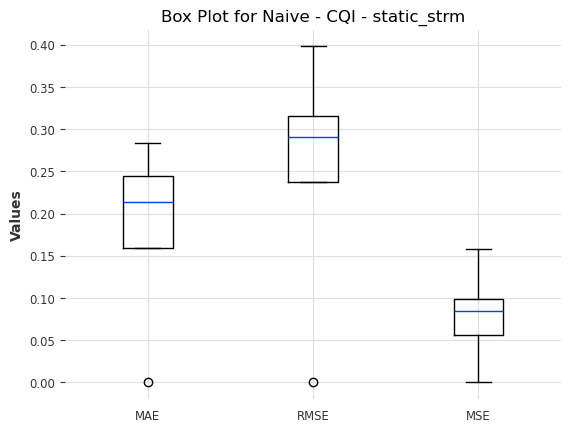

In [5]:
plot_box_for_row(df.iloc[0])

# Read a model csv

In [17]:
result_df = pd.read_parquet(r"..\checkpoints\results\uni_Naive_static_strm.gzip")

In [28]:
result_df

,Time_Index,Model,Actuals,Preds,ElapsedTime,target
0,"[2020-01-03T10:55:29.000000000, 2020-01-03T10:...",Naive,"[-101.0, -101.0, -100.5, -100.0, -100.0, -101....","[-102.0, -102.0, -102.0, -102.0, -102.0, -102....",0.454955,RSRP
1,"[2020-01-03T10:55:29.000000000, 2020-01-03T10:...",Naive,"[-11.0, -11.0, -11.5, -11.999999999999998, -11...","[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10...",0.383975,RSRQ
2,"[2020-01-03T10:55:29.000000000, 2020-01-03T10:...",Naive,"[1.0, 1.0, 2.0, 3.0000000000000013, 3.00000000...","[-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4....",0.586329,SNR
3,"[2020-01-03T10:55:29.000000000, 2020-01-03T10:...",Naive,"[9.0, 9.0, 10.0, 11.0, 11.0, 12.00000000000000...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",0.382970,CQI
4,"[2020-01-03T10:55:29.000000000, 2020-01-03T10:...",Naive,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.422060,RSSI
...,...,...,...,...,...,...
85,"[2019-12-19T15:01:37.000000000, 2019-12-19T15:...",Naive,"[-102.0, -102.0, -103.0, -103.0, -103.0, -101....","[-102.0, -102.0, -102.0, -102.0, -102.0, -102....",0.162211,RSRP
86,"[2019-12-19T15:01:37.000000000, 2019-12-19T15:...",Naive,"[-17.0, -17.0, -18.0, -18.0, -18.0, -17.0, -17...","[-16.0, -16.0, -16.0, -16.0, -16.0, -16.0, -16...",0.170998,RSRQ
87,"[2019-12-19T15:01:37.000000000, 2019-12-19T15:...",Naive,"[-4.0, -4.0, -0.9999999999999994, -0.999999999...","[4.000000000000001, 4.000000000000001, 4.00000...",0.174375,SNR
88,"[2019-12-19T15:01:37.000000000, 2019-12-19T15:...",Naive,"[12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 9.0...","[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12....",0.155425,CQI


In [30]:
def plot_actual_vs_preds(result_df: pd.DataFrame, row_number: int) -> None:
    """
    Plota as séries temporais reais versus as predições para uma linha específica do DataFrame.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals" e "Preds".
        row_number (int): Número da linha do DataFrame para plotar.
    """
    # Verifica se o índice da linha está dentro dos limites do DataFrame
    if row_number >= len(result_df):
        raise IndexError(f"row_number {row_number} está fora dos limites do DataFrame.")

    # Obtém os dados da linha especificada
    time_index = pd.DatetimeIndex(result_df["Time_Index"][row_number])
    actuals = result_df["Actuals"][row_number]
    preds = result_df["Preds"][row_number]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red")

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Linha {row_number}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

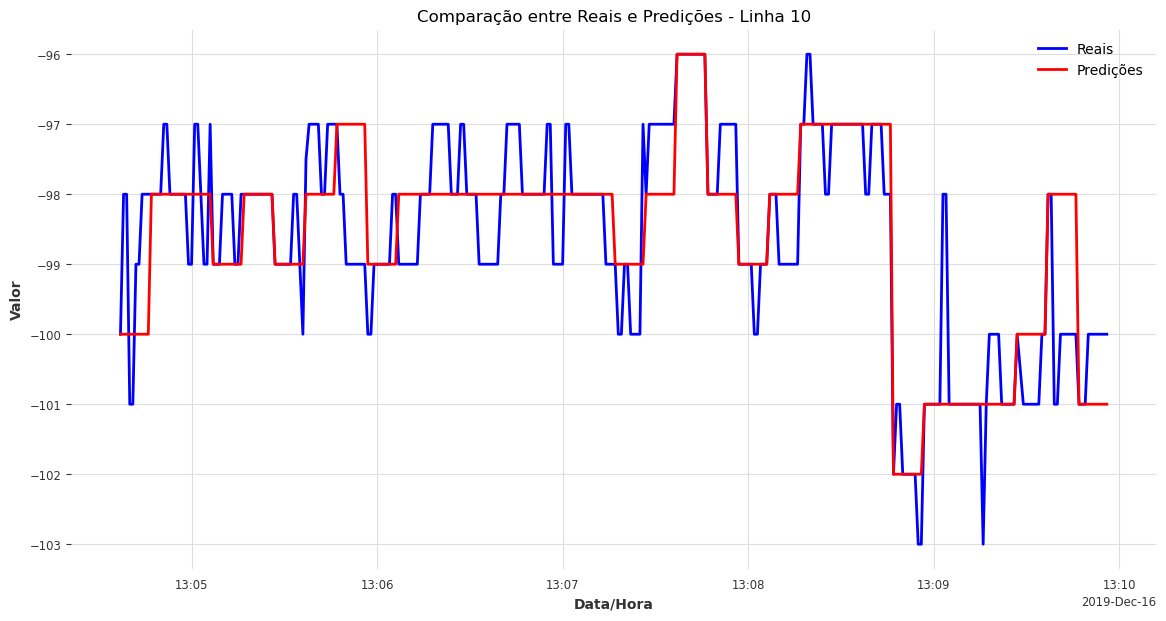

In [31]:
# Exemplo de uso
plot_actual_vs_preds(result_df, 10)